### Hierarchical clustering with Random Forest


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
train = pd.read_csv("/home/ec2-user/Final/FinalTrainingSet.csv")
test = pd.read_csv("/home/ec2-user/Final/FinalTestSet.csv")

In [3]:
train.shape

(495745, 56)

In [4]:
"DownSample train "
import random
random.seed(12)
unique_users = train.user_id.unique()
print("We have", len(unique_users), "unique users in the training set")
sel_user_ids = [unique_users[i] for i in sorted(random.sample(range(len(unique_users)), 20000)) ]
train = train[train.user_id.isin(sel_user_ids)]
print("new train shape", train.shape)

('We have', 80000, 'unique users in the training set')
('new train shape', (121227, 56))


We will use hierarchial clustering to create some new features

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
"Select var based on destination attributes: "
selectDestvar = ['srch_destination_id','user_location_region','season']
tr =  train[selectDestvar]
te =  test[selectDestvar]
traintest = tr.append(te)
traintest = traintest.drop_duplicates()
print("size of train after dropping duplicates", train.shape)
data_dist = pdist(traintest[selectDestvar], 'cosine') # computing the distance
data_link = linkage(data_dist, 'average') # computing the linkage
dendrogram(data_link)
plt.xlabel('data points')
plt.ylabel('cosine Distance')
plt.suptitle('clustering based on destination attribute', fontweight='bold', fontsize=14);

('size of train after dropping duplicates', (311167, 54))


In [ ]:
#from scipy.spatial.distance import pdist, squareform
#from scipy.cluster.hierarchy import linkage, dendrogram
"Select var based on hotel attributes: "
selectHotelvar = ['hotel_continent', 'hotel_country','hotel_market','month']
tr =  train[selectHotelvar]
te =  test[selectHotelvar]
traintest = tr.append(te)
traintest = traintest.drop_duplicates()
data_dist = pdist(traintest[selectHotelvar], 'cosine') # computing the distance
data_link = linkage(data_dist, 'average') # computing the linkage
dendrogram(data_link)
plt.xlabel('data points')
plt.ylabel('cosine Distance')
plt.suptitle('clustering based on hotel attribute', fontweight='bold', fontsize=14);

In [ ]:
"Select var based on user attributes: "
selectUserVar = ['user_location_country', 'user_location_region', 'user_location_city' , 'site_name']
tr =  train[selectUserVar]
te =  test[selectUserVar]
traintest = tr.append(te)
traintest = traintest.drop_duplicates()
data_dist = pdist(traintest[selectUserVar], 'cosine') # computing the distance
data_link = linkage(data_dist, 'average') # computing the linkage
dendrogram(data_link)
plt.xlabel('data points')
plt.ylabel('cosine Distance')
plt.suptitle('clustering based on user attribute', fontweight='bold', fontsize=14);

In [5]:
"Select var based on user attributes:"
selectUserVar = ['user_location_country', 'user_location_region', 'site_name']
tr =  train[selectUserVar]
print("train size before concatenating", tr.shape)
te =  test[selectUserVar]
print("test size before concatenating", te.shape)
traintest = tr.append(te)
print("size before dropping duplicates", traintest.shape)
traintest = traintest.drop_duplicates()
print("size after dropping duplicates", traintest.shape)

" Clustering Starts:"
from sklearn.cluster import AgglomerativeClustering 
hclust= AgglomerativeClustering(n_clusters=8, affinity='cosine',linkage='average')
cluster_id = hclust.fit_predict(traintest) # get the ids

"Join Clusters"
traintest['cluster_U'] = pd.Series(cluster_id, index=traintest.index)
print("train size before adding new feature", train.shape)
print("test size before adding new feature", test.shape)
train = train.merge(traintest, how='left', left_on=selectUserVar, 
                  right_on=selectUserVar)
test = test.merge(traintest, how='left', left_on=selectUserVar, 
                  right_on=selectUserVar)
print("train size after adding new feature", train.shape)
print("test size after adding new feature", test.shape)

('train size before concatenating', (121227, 3))
('test size before concatenating', (41597, 3))
('size before dropping duplicates', (162824, 3))
('size after dropping duplicates', (2612, 3))
('train size before adding new feature', (121227, 56))
('test size before adding new feature', (41597, 56))
('train size after adding new feature', (121227, 57))
('test size after adding new feature', (41597, 57))


In [6]:
"Select var based on hotel attributes: "
selectHotelvar = ['hotel_continent', 'hotel_country','hotel_market','month']
tr =  train[selectHotelvar]
print("train size before concatenating", tr.shape)
te =  test[selectHotelvar]
print("test size before concatenating", te.shape)
traintest = tr.append(te)
print("size before dropping duplicates", traintest.shape)
traintest = traintest.drop_duplicates()
print("size after dropping duplicates", traintest.shape)

" Clustering Starts: We are using cosine similarities"
from sklearn.cluster import AgglomerativeClustering 
hclust= AgglomerativeClustering(n_clusters=8, affinity='cosine',linkage='average')
cluster_id = hclust.fit_predict(traintest) # get the ids

"Join Clusters"
traintest['cluster_H'] = pd.Series(cluster_id, index=traintest.index)
print("train size before adding new feature", train.shape)
print("test size before adding new feature", test.shape)
train = train.merge(traintest, how='left', left_on=selectHotelvar, 
                  right_on=selectHotelvar)
test = test.merge(traintest, how='left', left_on=selectHotelvar, 
                  right_on=selectHotelvar)
print("train size after adding new feature", train.shape)
print("test size after adding new feature", test.shape)

('train size before concatenating', (121227, 4))
('test size before concatenating', (41597, 4))
('size before dropping duplicates', (162824, 4))
('size after dropping duplicates', (13732, 4))
('train size before adding new feature', (121227, 57))
('test size before adding new feature', (41597, 57))
('train size after adding new feature', (121227, 58))
('test size after adding new feature', (41597, 58))


In [7]:
"Select var based on destination attributes: "
selectDestvar = ['srch_destination_type_id', 'user_location_region']
tr =  train[selectDestvar]
print("train size before concatenating", tr.shape)
te =  test[selectDestvar]
print("test size before concatenating", te.shape)
traintest = tr.append(te)
print("size before dropping duplicates", traintest.shape)
traintest = traintest.drop_duplicates()
print("size after dropping duplicates", traintest.shape)

" Clustering Starts: We are using cosine similarities"
from sklearn.cluster import AgglomerativeClustering 
hclust= AgglomerativeClustering(n_clusters=8, affinity='cosine',linkage='average')
cluster_id = hclust.fit_predict(traintest) # get the ids

"Join Clusters"
traintest['cluster_D'] = pd.Series(cluster_id, index=traintest.index)
print("train size before adding new feature", train.shape)
print("test size before adding new feature", test.shape)
train = train.merge(traintest, how='left', left_on=selectDestvar, 
                  right_on=selectDestvar)
test = test.merge(traintest, how='left', left_on=selectDestvar, 
                  right_on=selectDestvar)
print("train size after adding new feature", train.shape)
print("test size after adding new feature", test.shape)

('train size before concatenating', (121227, 2))
('test size before concatenating', (41597, 2))
('size before dropping duplicates', (162824, 2))
('size after dropping duplicates', (2532, 2))
('train size before adding new feature', (121227, 58))
('test size before adding new feature', (41597, 58))
('train size after adding new feature', (121227, 59))
('test size after adding new feature', (41597, 59))


In [8]:
print("test shape", test.shape)
print("train shape", train.shape)

('test shape', (41597, 59))
('train shape', (121227, 59))


In [10]:
train.to_csv("~/Final/hclustDatTrain.csv")
test.to_csv("~/Final/hclustDatTest.csv")
# We downsample train data for test
# Test data is same but we added cluster id features. 

In [13]:
train.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'user_location_country',
       'hotel_cluster', 'user_location_region', 'user_location_city',
       'hotel_country', 'hotel_market', 'srch_destination_id', 'date_time',
       'site_name', 'posa_continent', 'orig_destination_distance',
       'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci',
       'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent',
       'year', 'month', 'day', 'hour', 'part_of_day', 'type_of_day',
       'season', 'is_alone', 'dest_feature_pc1', 'dest_feature_pc2',
       'dest_feature_pc3', 'clickRate', 'bookRate', 'clickMRate',
       'bookMRate', 'clickHCRate', 'bookHCRate', 'clickURate', 'bookURate',
       'clickUCRRate', 'bookUCRRate', 'clickUCRate', 'bookUCRate',
       'popScoreHmc_Count', 'popScoreU_Count', 'popScoreSite_Count',
       'popScoreDest_Count', 'popScoreCityDest_Count',
       'popScoreCityH_Count', 'duration

In [14]:
test.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'user_location_country',
       'hotel_cluster', 'user_location_region', 'user_location_city',
       'hotel_country', 'hotel_market', 'srch_destination_id', 'date_time',
       'site_name', 'posa_continent', 'orig_destination_distance',
       'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci',
       'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent',
       'year', 'month', 'day', 'hour', 'part_of_day', 'type_of_day',
       'season', 'is_alone', 'dest_feature_pc1', 'dest_feature_pc2',
       'dest_feature_pc3', 'clickRate', 'bookRate', 'clickMRate',
       'bookMRate', 'clickHCRate', 'bookHCRate', 'clickURate', 'bookURate',
       'clickUCRRate', 'bookUCRRate', 'clickUCRate', 'bookUCRate',
       'popScoreHmc_Count', 'popScoreU_Count', 'popScoreSite_Count',
       'popScoreDest_Count', 'popScoreCityDest_Count',
       'popScoreCityH_Count', 'duration

#### Introduce these new feature and check weather it improves performance!

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from itertools import chain
model6_RF = RandomForestClassifier(n_estimators=50, min_weight_fraction_leaf=0.1, random_state=3)
popularityVar = ['popScoreHmc_Count', 'popScoreU_Count', 'popScoreSite_Count',
       'popScoreDest_Count', 'popScoreCityDest_Count',
       'popScoreCityH_Count','cluster_U', 'cluster_H',
       'cluster_D'] 
model6_RF.fit(train[popularityVar], train['hotel_cluster'])
test_score = model6_RF.score(test[popularityVar], test['hotel_cluster'])
print("accuracy score for test - Model 6(in %) is:",test_score*100)

('accuracy score for test - Model 6(in %) is:', 7.938072457148353)


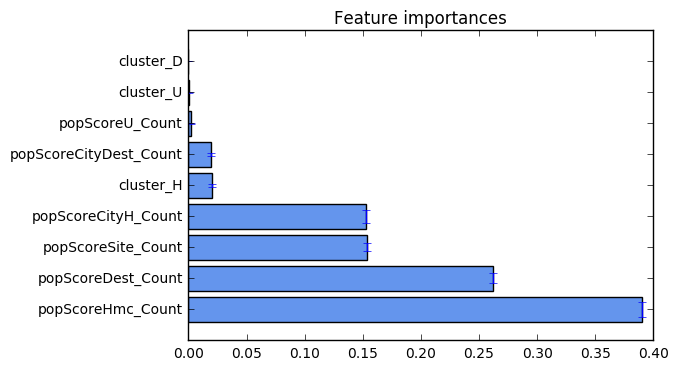

In [18]:
importances = model6_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model6_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.barh(range(len(popularityVar)), importances[indices], yerr=std[indices], align="center", color='cornflowerblue')
impFeatures=[]
for i in indices:
    impFeatures.append(popularityVar[i])
    
plt.yticks(range(len(popularityVar)), impFeatures)
plt.ylim([-1, len(popularityVar)])
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from itertools import chain
model3_RF = RandomForestClassifier(n_estimators=50, min_weight_fraction_leaf=0.1, random_state=3)

fatureEng1 = [    'part_of_day', 'type_of_day', 'season', 
                  'duration_of_stay', 'is_alone', 
                  'dest_feature_pc1', 'dest_feature_pc2', 'dest_feature_pc3','cluster_U', 'cluster_H',
       'cluster_D' ]
model3_RF.fit(train[fatureEng1], train['hotel_cluster'])
test_score = model3_RF.score(test[fatureEng1], test['hotel_cluster'])
print("accuracy score for test - Model 3(in %) is:",test_score*100)

('accuracy score for test - Model 3(in %) is:', 7.1038776834867896)


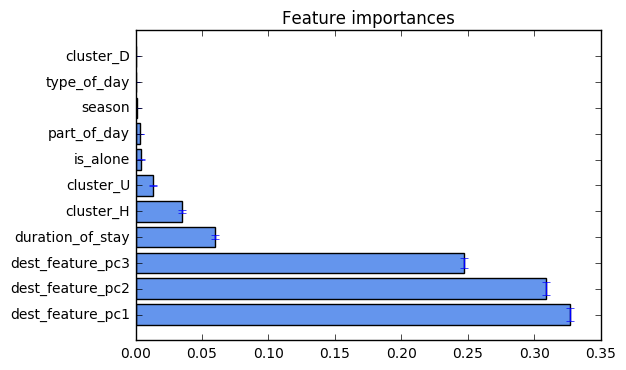

In [19]:
importances = model3_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model3_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.barh(range(len(fatureEng1)), importances[indices], yerr=std[indices], align="center", color='cornflowerblue')
impFeatures=[]
for i in indices:
    impFeatures.append(fatureEng1[i])
    
plt.yticks(range(len(fatureEng1)), impFeatures)
plt.ylim([-1, len(fatureEng1)])
plt.show()

Cluster ids found significant and test score accuracy increased by 1-2%